## Installing necessary packages

In [23]:
!pip install mlflow pyngrok --quiet

## Importing necessary packages

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import mlflow
import mlflow.sklearn

## Setting up MLflow with ngrok

In [25]:
from google.colab import userdata
ngrok_token = userdata.get("ngrokToken")

In [44]:
# ngrok.kill()

In [27]:
get_ipython().system_raw("mlflow ui --port 2000 &")
mlflow.set_tracking_uri("http://localhost:2000")
from pyngrok import ngrok
ngrok.set_auth_token(ngrok_token)

In [28]:
public_url = ngrok.connect(2000).public_url
print(public_url)

https://dino-advisory-unprimitively.ngrok-free.dev


## Preprocessing dataset

In [ ]:
df = pd.read_csv("dataset/penguins.csv")

In [30]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [31]:
df.shape

(344, 5)

### Checking and dropping the null values

In [32]:
df.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


In [33]:
df = df.dropna()

In [34]:
df.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


### Encoding the 'sex' column

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [36]:
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"].astype(str))

### Scaling the data

In [37]:
scaler = StandardScaler()

In [38]:
X_scaled = scaler.fit_transform(df)

## Building and training the model

### Setting up Mlflow

In [39]:
mlflow.set_experiment("Penguin_KMeans_Clustering")

scores = []

for n_clusters in range(2, 9):
    with mlflow.start_run(run_name=f"kmeans_k={n_clusters}"):
        random_state = 42

        # Instantiating the KMeans object and training on the scaled data
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(X_scaled)

        # Calculating the metrics
        labels = kmeans.labels_
        silhouette = silhouette_score(X_scaled, labels)
        scores.append(silhouette)

        # Logging the information to MLflow
        mlflow.log_param("n_clusters", n_clusters)
        mlflow.log_param("random_state", random_state)
        mlflow.log_metric("silhouette_score", silhouette)

        # Logging the model
        mlflow.sklearn.log_model(kmeans, "kmeans_model")

        print("KMeans training complete.")
        print(f"Silhouette Score: {silhouette:.4f}")

2025/10/12 12:10:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/12 12:11:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KMeans training complete.
Silhouette Score: 0.3969
🏃 View run kmeans_k=2 at: http://localhost:2000/#/experiments/133151475505560054/runs/b202e86adbd048f68e18401bf49b4fd6
🧪 View experiment at: http://localhost:2000/#/experiments/133151475505560054


2025/10/12 12:11:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/12 12:11:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KMeans training complete.
Silhouette Score: 0.3970
🏃 View run kmeans_k=3 at: http://localhost:2000/#/experiments/133151475505560054/runs/4166b90340f24950bc8cb97bd62f0d1c
🧪 View experiment at: http://localhost:2000/#/experiments/133151475505560054


2025/10/12 12:11:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/12 12:11:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KMeans training complete.
Silhouette Score: 0.3781
🏃 View run kmeans_k=4 at: http://localhost:2000/#/experiments/133151475505560054/runs/987d785b9da348598b4b2da9e089cc8c
🧪 View experiment at: http://localhost:2000/#/experiments/133151475505560054


2025/10/12 12:11:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/12 12:11:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KMeans training complete.
Silhouette Score: 0.5214
🏃 View run kmeans_k=5 at: http://localhost:2000/#/experiments/133151475505560054/runs/e560bfa853a44c27ad41e07be546394d
🧪 View experiment at: http://localhost:2000/#/experiments/133151475505560054


2025/10/12 12:11:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/12 12:11:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KMeans training complete.
Silhouette Score: 0.5460
🏃 View run kmeans_k=6 at: http://localhost:2000/#/experiments/133151475505560054/runs/40e26f5251154d9c844d29967d7c8f00
🧪 View experiment at: http://localhost:2000/#/experiments/133151475505560054


2025/10/12 12:11:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/12 12:11:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KMeans training complete.
Silhouette Score: 0.4745
🏃 View run kmeans_k=7 at: http://localhost:2000/#/experiments/133151475505560054/runs/96fe06eb21bb473293536aaa1b1878ae
🧪 View experiment at: http://localhost:2000/#/experiments/133151475505560054


2025/10/12 12:11:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/12 12:11:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KMeans training complete.
Silhouette Score: 0.4977
🏃 View run kmeans_k=8 at: http://localhost:2000/#/experiments/133151475505560054/runs/5581a324e0f84d79981ab0fb44bef25c
🧪 View experiment at: http://localhost:2000/#/experiments/133151475505560054


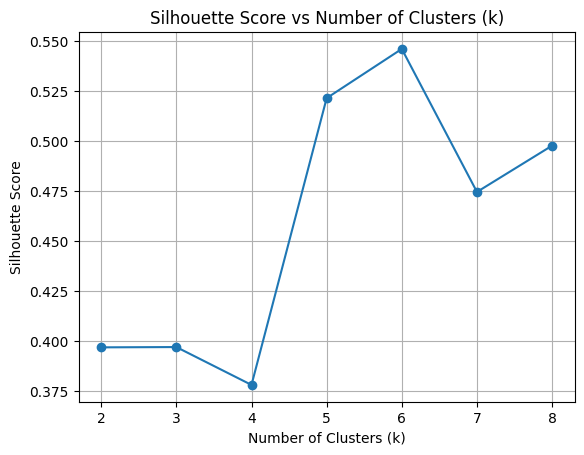

In [40]:
import matplotlib.pyplot as plt

ks = range(2, 9)

plt.plot(ks, scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

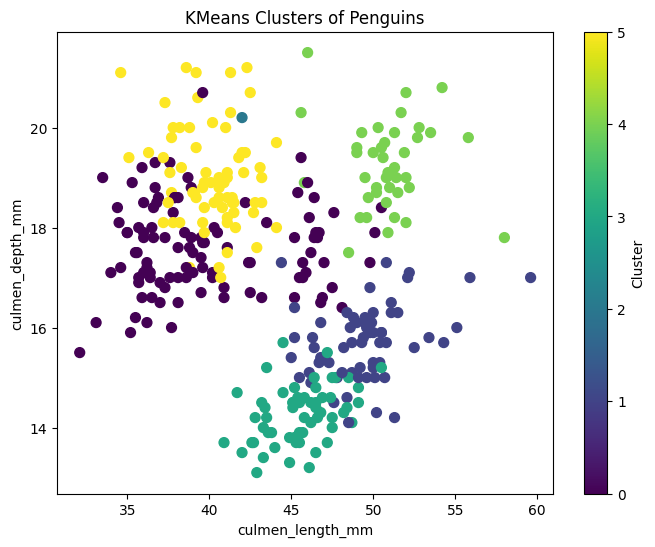

In [41]:
# Predicting cluster labels using best model i.e. n_clusters=6
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Using original (unscaled) data for readability
df["cluster"] = labels

# Picking two features for plotting
x_col = "culmen_length_mm"
y_col = "culmen_depth_mm"

plt.figure(figsize=(8,6))
plt.scatter(df[x_col], df[y_col], c=labels, cmap="viridis", s=50)
plt.title("KMeans Clusters of Penguins")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.colorbar(label="Cluster")
plt.show()

In [42]:
centers = kmeans.cluster_centers_
centers_unscaled = scaler.inverse_transform(centers)
centers_df = pd.DataFrame(centers_unscaled, columns=df.drop("cluster", axis=1).columns)
print(centers_df)

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g       sex
0         39.848077        17.596154         188.971154  3410.576923  1.000000
1         49.473770        15.718033         221.540984  5484.836066  2.000000
2         42.000000        20.200000        5000.000000  4250.000000  2.000000
3         45.545763        14.262712         212.779661  4683.050847  0.983051
4         50.842500        19.242500         198.850000  3950.625000  1.925000
5         40.158571        19.022857         187.628571  4031.785714  2.000000


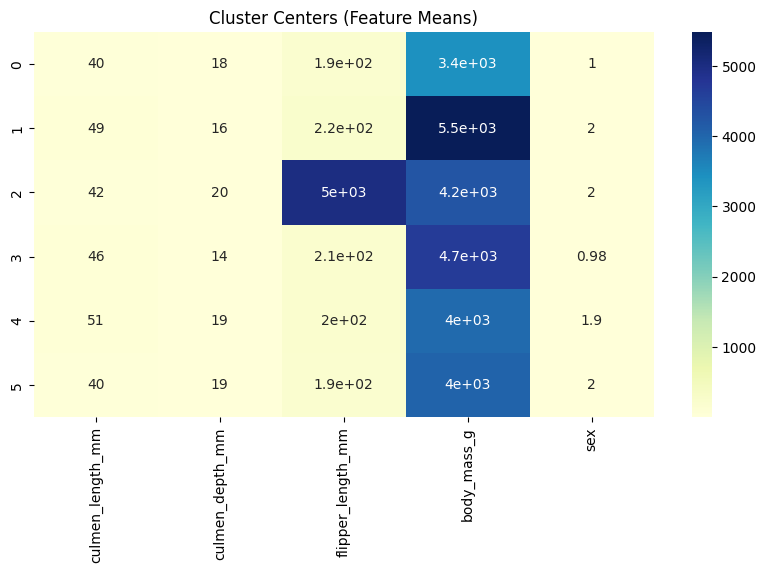

In [43]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(centers_df, annot=True, cmap="YlGnBu")
plt.title("Cluster Centers (Feature Means)")
plt.show()